# Car Price Prediction

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, accuracy_score

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load and Prepare Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
car_df = pd.read_csv("CarPrice_Assignment.csv")

## EDA

In [ ]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car_df.shape

(205, 26)

This dataset has 205 rows and 26 columns.


In [ ]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
print(car_df.isna().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Our dataset does not have any null values.

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_df.CarName.value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [ ]:
car_df.fueltype.value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [ ]:
car_df.aspiration.value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [ ]:
car_df.doornumber.value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [ ]:
car_df.carbody.value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [ ]:
car_df.drivewheel.value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [ ]:
car_df.enginelocation.value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [ ]:
car_df.enginetype.value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [ ]:
car_df.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [ ]:
car_df.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [ ]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualization

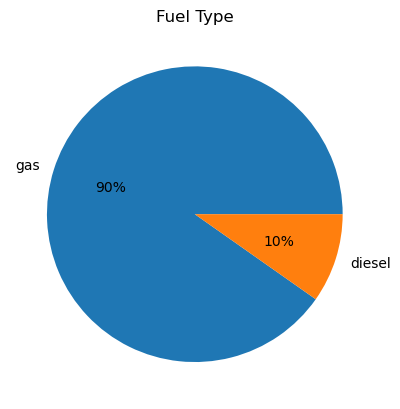

In [ ]:
data = car_df['fueltype'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Fuel Type")

plt.show()

The 90% of cars use diesel fuel.

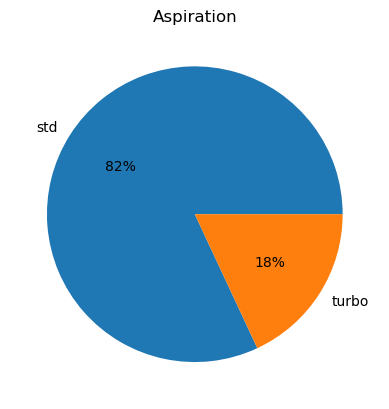

In [ ]:
data = car_df['aspiration'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Aspiration")

plt.show()

We can see from the pie chart that 82% of cars have naturally aspirated engines that draw in air naturally.The 18% of cars have forced induction through a turbocharger.

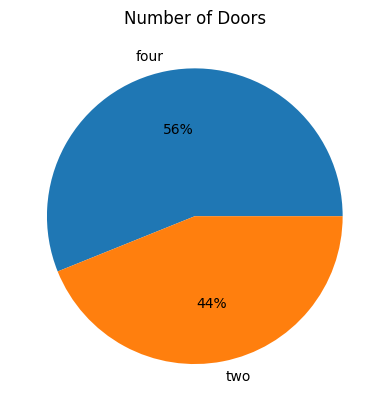

In [ ]:
data = car_df['doornumber'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Number of Doors")

plt.show()

Most of the cars have 4 doors.

Since neural networks can only work with numerical inputs, I converted the `doornumber` column from string values ('two', 'four') to integers (2, 4). This column represents actual quantities, so mapping it directly to numbers preserves its meaning and helps the model learn more effectively.

In [ ]:
car_df['doornumber'] = car_df['doornumber'].map({'two': 2, 'four': 4})

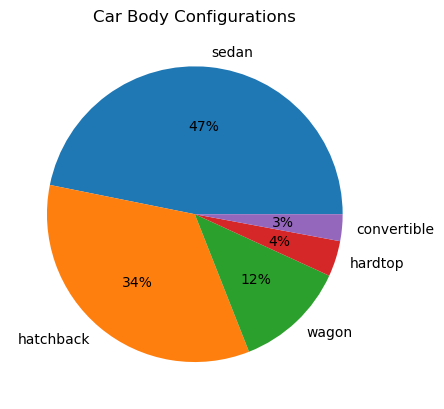

In [ ]:
data = car_df['carbody'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Car Body Configurations")

plt.show()

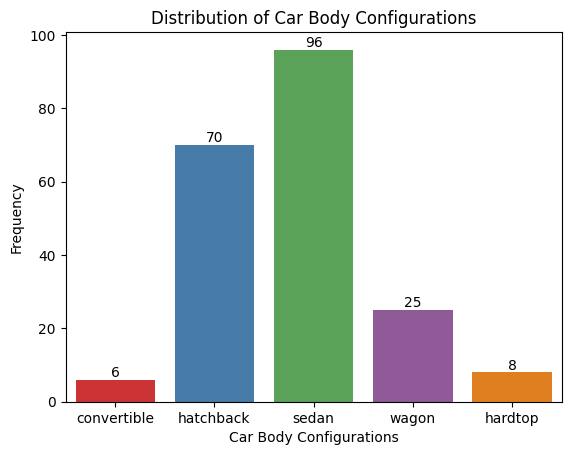

In [ ]:
chart = sns.countplot(x=car_df['carbody'], palette='Set1')

plt.title("Distribution of Car Body Configurations")
plt.ylabel("Frequency")
plt.xlabel("Car Body Configurations")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The majority of cars(47% or 96 cars) have `Sedan` body configurations.Only 6 cars have convertible body.

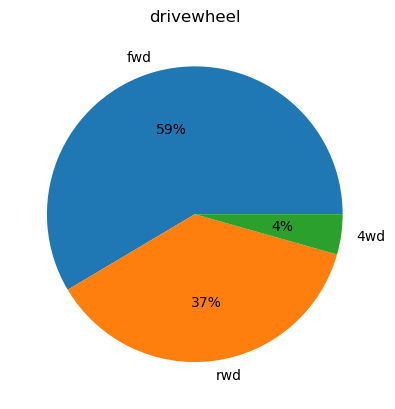

In [ ]:
data = car_df['drivewheel'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("drivewheel")

plt.show()

The majority of the cars in the dataset (59%) are equipped with front-wheel drive. Rear-wheel drive vehicles account for approximately 37% of the data, while only about 4% have four-wheel drive.

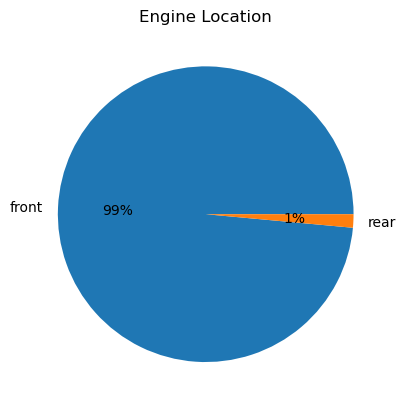

In [ ]:
data = car_df['enginelocation'].value_counts()
plt.pie(data, labels=data.index, autopct='%.0f%%')
plt.title("Engine Location")

plt.show()

The engines of 99% of the cars in this dataset are located in the front, while only 1% have their engines in the rear.

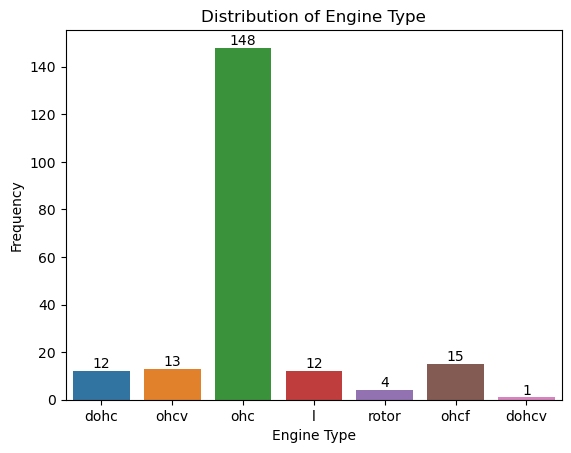

In [ ]:
chart = sns.countplot(x=car_df['enginetype'])
plt.title("Distribution of Engine Type")
plt.ylabel("Frequency")
plt.xlabel("Engine Type")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The majority of cars have an `overhead camshaft(ohc)` engine type.

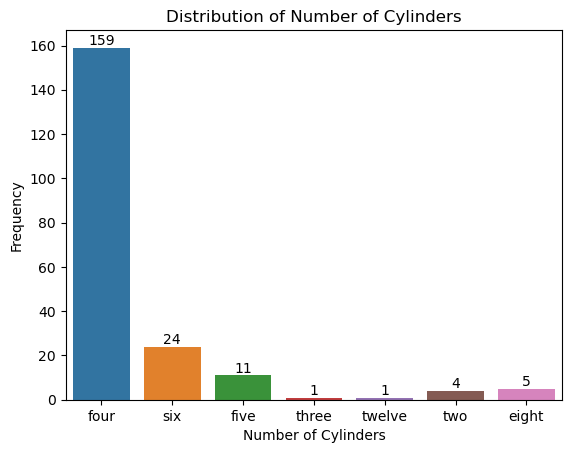

In [ ]:
chart = sns.countplot(x=car_df['cylindernumber'])

plt.title("Distribution of Number of Cylinders")
plt.ylabel("Frequency")
plt.xlabel("Number of Cylinders")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The most common number of cylinders is four, with 159 cars having four cylinders. Cars with three and twelve cylinders are less frequent.

Like `doornumber` column, `cylindernumber` is inherently numerical and have an order.So it is better to convert its values to number.

In [ ]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
car_df['cylindernumber'] = car_df['cylindernumber'].map(cylinder_map)

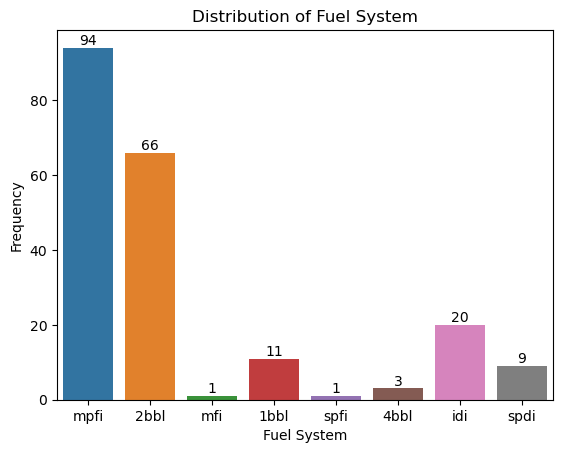

In [ ]:
chart = sns.countplot(x=car_df['fuelsystem'])

plt.title("Distribution of Fuel System")
plt.ylabel("Frequency")
plt.xlabel("Fuel System")

for container in chart.containers:
        chart.bar_label(container)

plt.show()

The engine of the majority of cars have multi-point fuel injection (MPFI) system with 94 instances.This is followed by 2-Barrel system(2bbl) with 66 cars.Other fuel systems like idi, 1bbl, and spdi appear less frequently, while mfi, spfi, and 4bbl are rare.

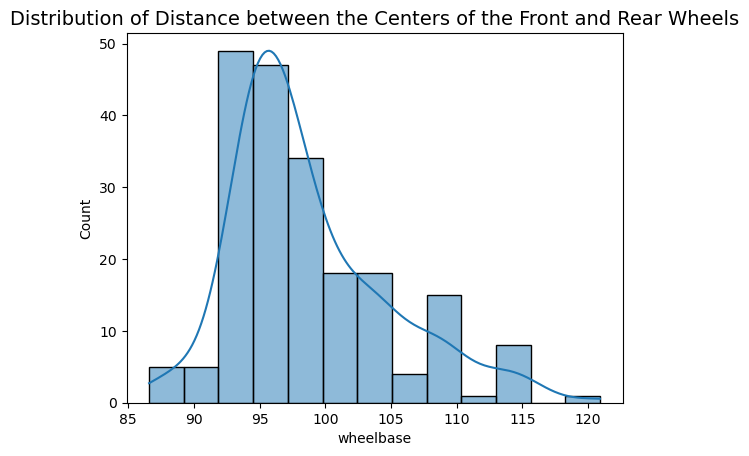

In [ ]:
plt.title('Distribution of Distance between the Centers of the Front and Rear Wheels', fontsize=14)

sns.histplot(data=car_df, x='wheelbase', kde=True)

plt.show()

According to the plot, the wheelbase of most cars ranges between 92 and 97 inches.

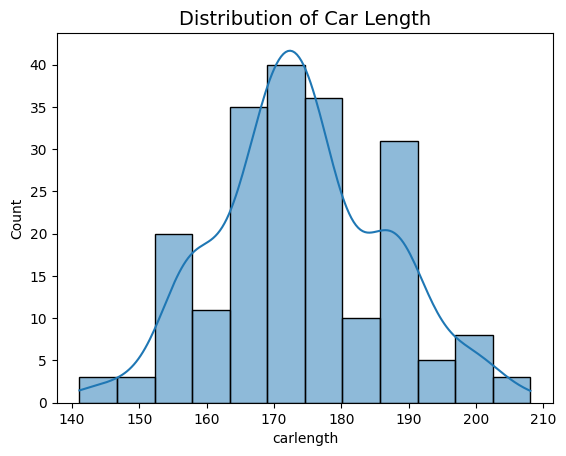

In [ ]:
plt.title('Distribution of Car Length', fontsize=14)

sns.histplot(data=car_df, x='carlength', kde=True)

plt.show()

The plot shows that the majority of cars in this dataset have a length between 170 and 175 inches.

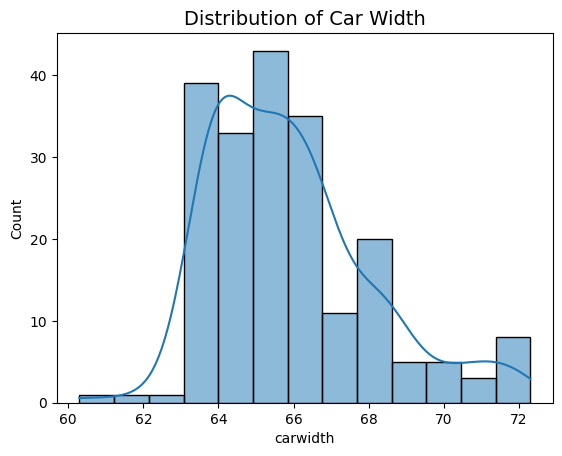

In [ ]:
plt.title('Distribution of Car Width', fontsize=14)

sns.histplot(data=car_df, x='carwidth', kde=True)

plt.show()

The plot shows that the majority of cars in this dataset have a width between 63 and 66 inches.

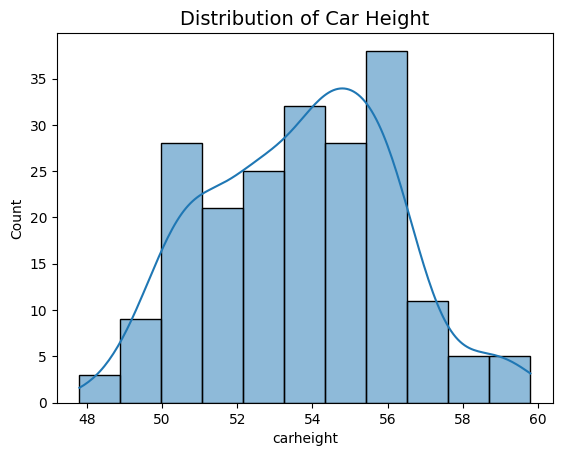

In [ ]:
plt.title('Distribution of Car Height', fontsize=14)

sns.histplot(data=car_df, x='carheight', kde=True)

plt.show()

The most common range for car height is between 52 and 56 inches.

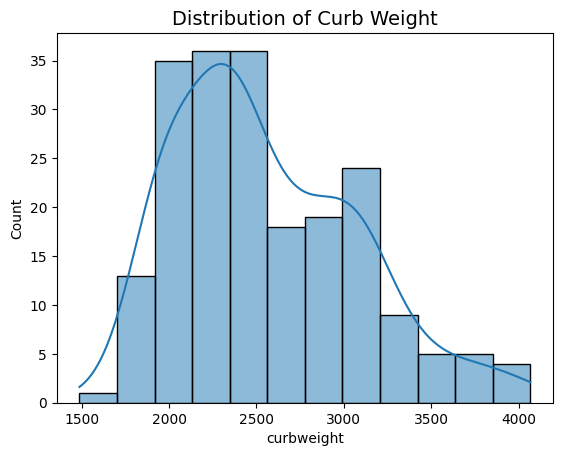

In [ ]:
plt.title('Distribution of Curb Weight', fontsize=14)

sns.histplot(data=car_df, x='curbweight', kde=True, bins=12)

plt.show()

Based on this distribution plot, most cars have a curb weight ranging from 2000 to 2500 lbs.

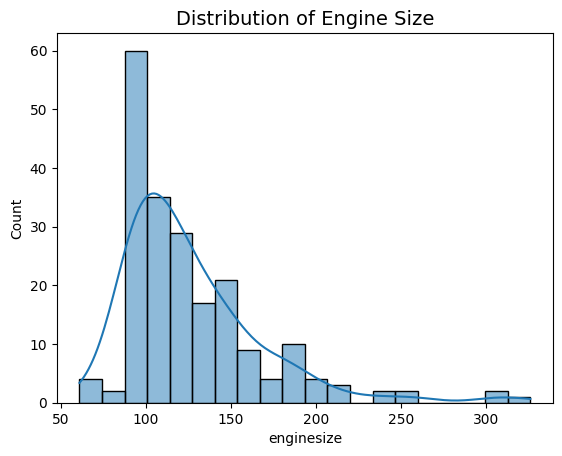

In [ ]:
plt.title('Distribution of Engine Size', fontsize=14)

sns.histplot(data=car_df, x='enginesize', bins=20, kde=True)

plt.show()

The engine size of most cars in the dataset falls within the range of 85 to 115 cc.

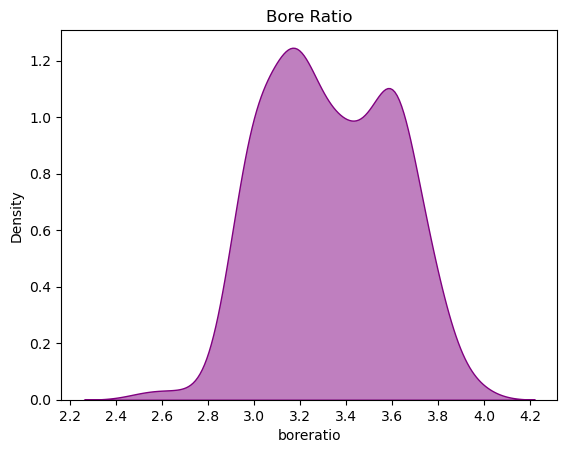

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(car_df.boreratio, shade=True, color='purple', alpha=0.5, ax = ax)

ax.xaxis.set_major_locator(MaxNLocator(nbins=12))

plt.title('Bore Ratio')
plt.show()

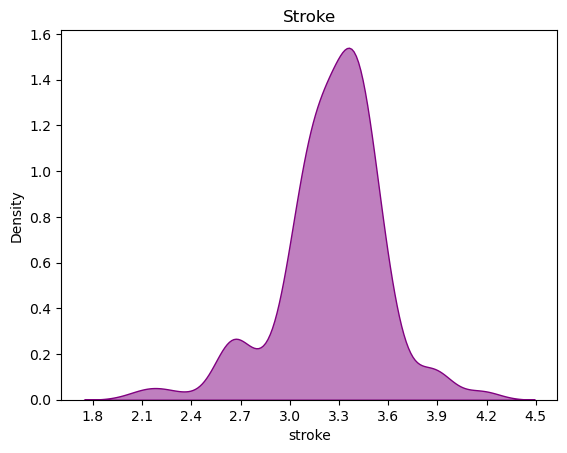

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(car_df.stroke, shade=True, color='purple', alpha=0.5, ax = ax)

ax.xaxis.set_major_locator(MaxNLocator(nbins=12))

plt.title('Stroke')
plt.show()

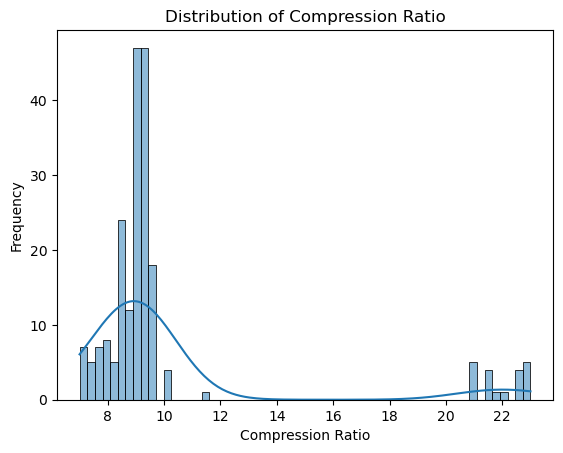

In [ ]:
sns.histplot(car_df['compressionratio'], kde=True)
plt.title("Distribution of Compression Ratio")
plt.xlabel("Compression Ratio")
plt.ylabel("Frequency")
plt.show()

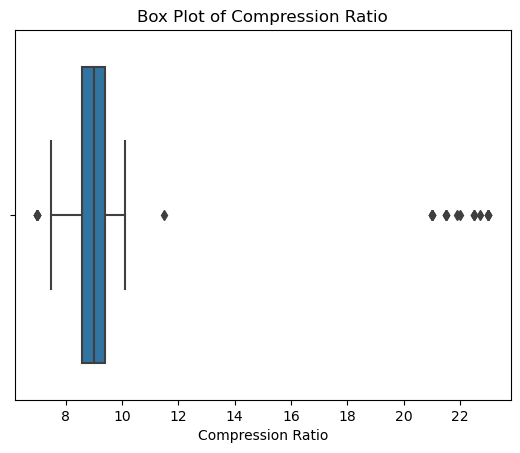

In [ ]:
sns.boxplot(x=car_df['compressionratio'])
plt.title("Box Plot of Compression Ratio")
plt.xlabel("Compression Ratio")
plt.show()

According to the plot, the majority of cars have a compression ratio between 8 and 10.

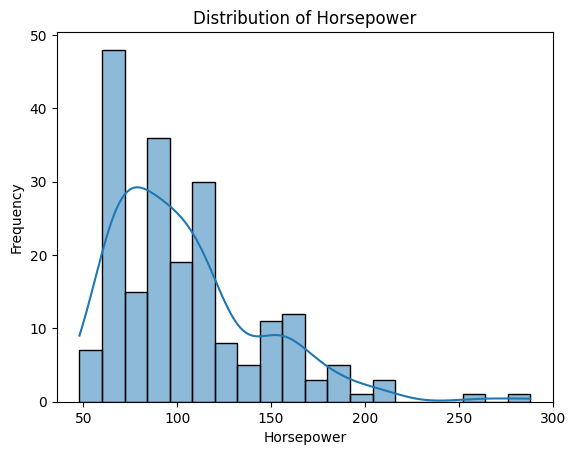

In [ ]:
sns.histplot(car_df['horsepower'], bins=20, kde=True)

plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of Horsepower")

plt.show()

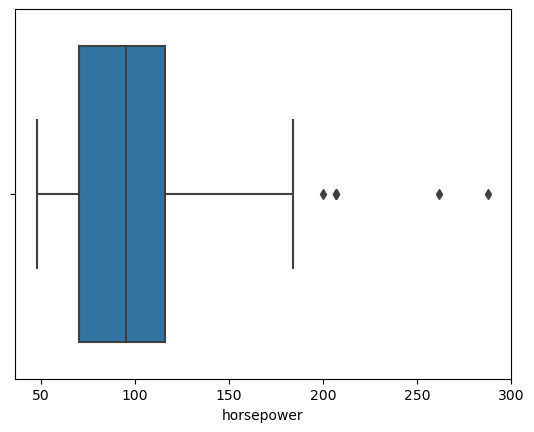

In [ ]:
sns.boxplot(x=car_df.horsepower)

plt.show()

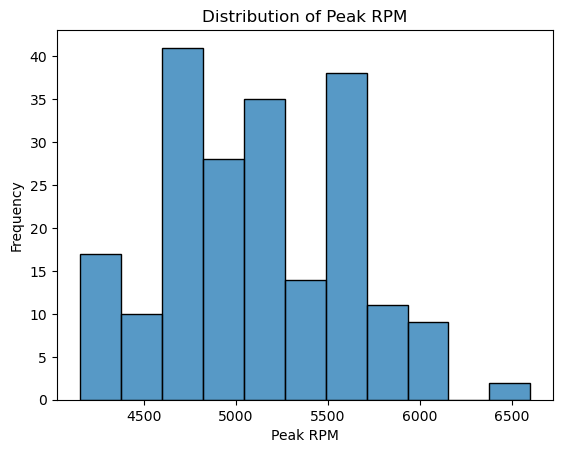

In [ ]:
sns.histplot(car_df['peakrpm'])

plt.xlabel("Peak RPM")
plt.ylabel("Frequency")
plt.title("Distribution of Peak RPM")

plt.show()

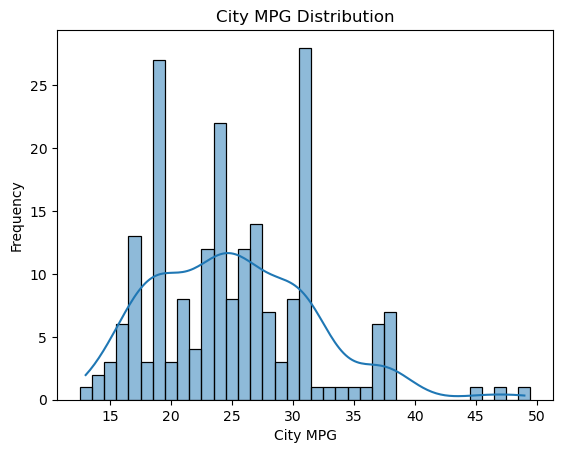

In [ ]:
sns.histplot(car_df['citympg'], kde=True, discrete=True)

plt.xlabel("City MPG")
plt.ylabel("Frequency")
plt.title("City MPG Distribution")

plt.show()

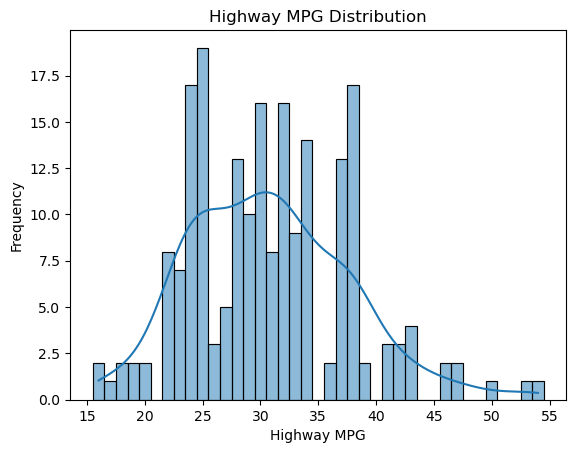

In [ ]:
sns.histplot(car_df['highwaympg'], kde=True, discrete=True)

plt.xlabel("Highway MPG")
plt.ylabel("Frequency")
plt.title("Highway MPG Distribution")

plt.show()

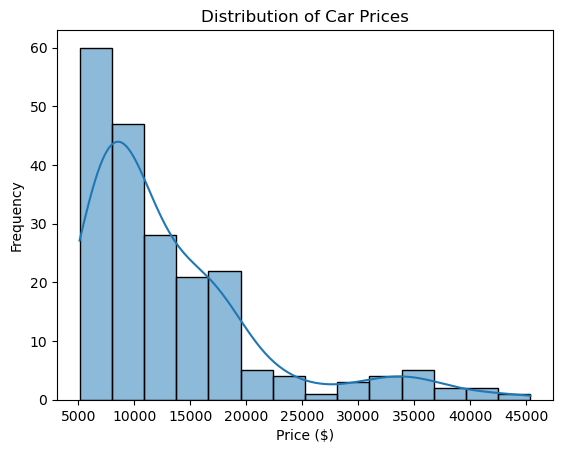

In [ ]:
#sns.kdeplot(car_df.price, shade=True, color='purple', alpha=0.5)
sns.histplot(data=car_df, x='price', kde=True)

plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")

plt.show()

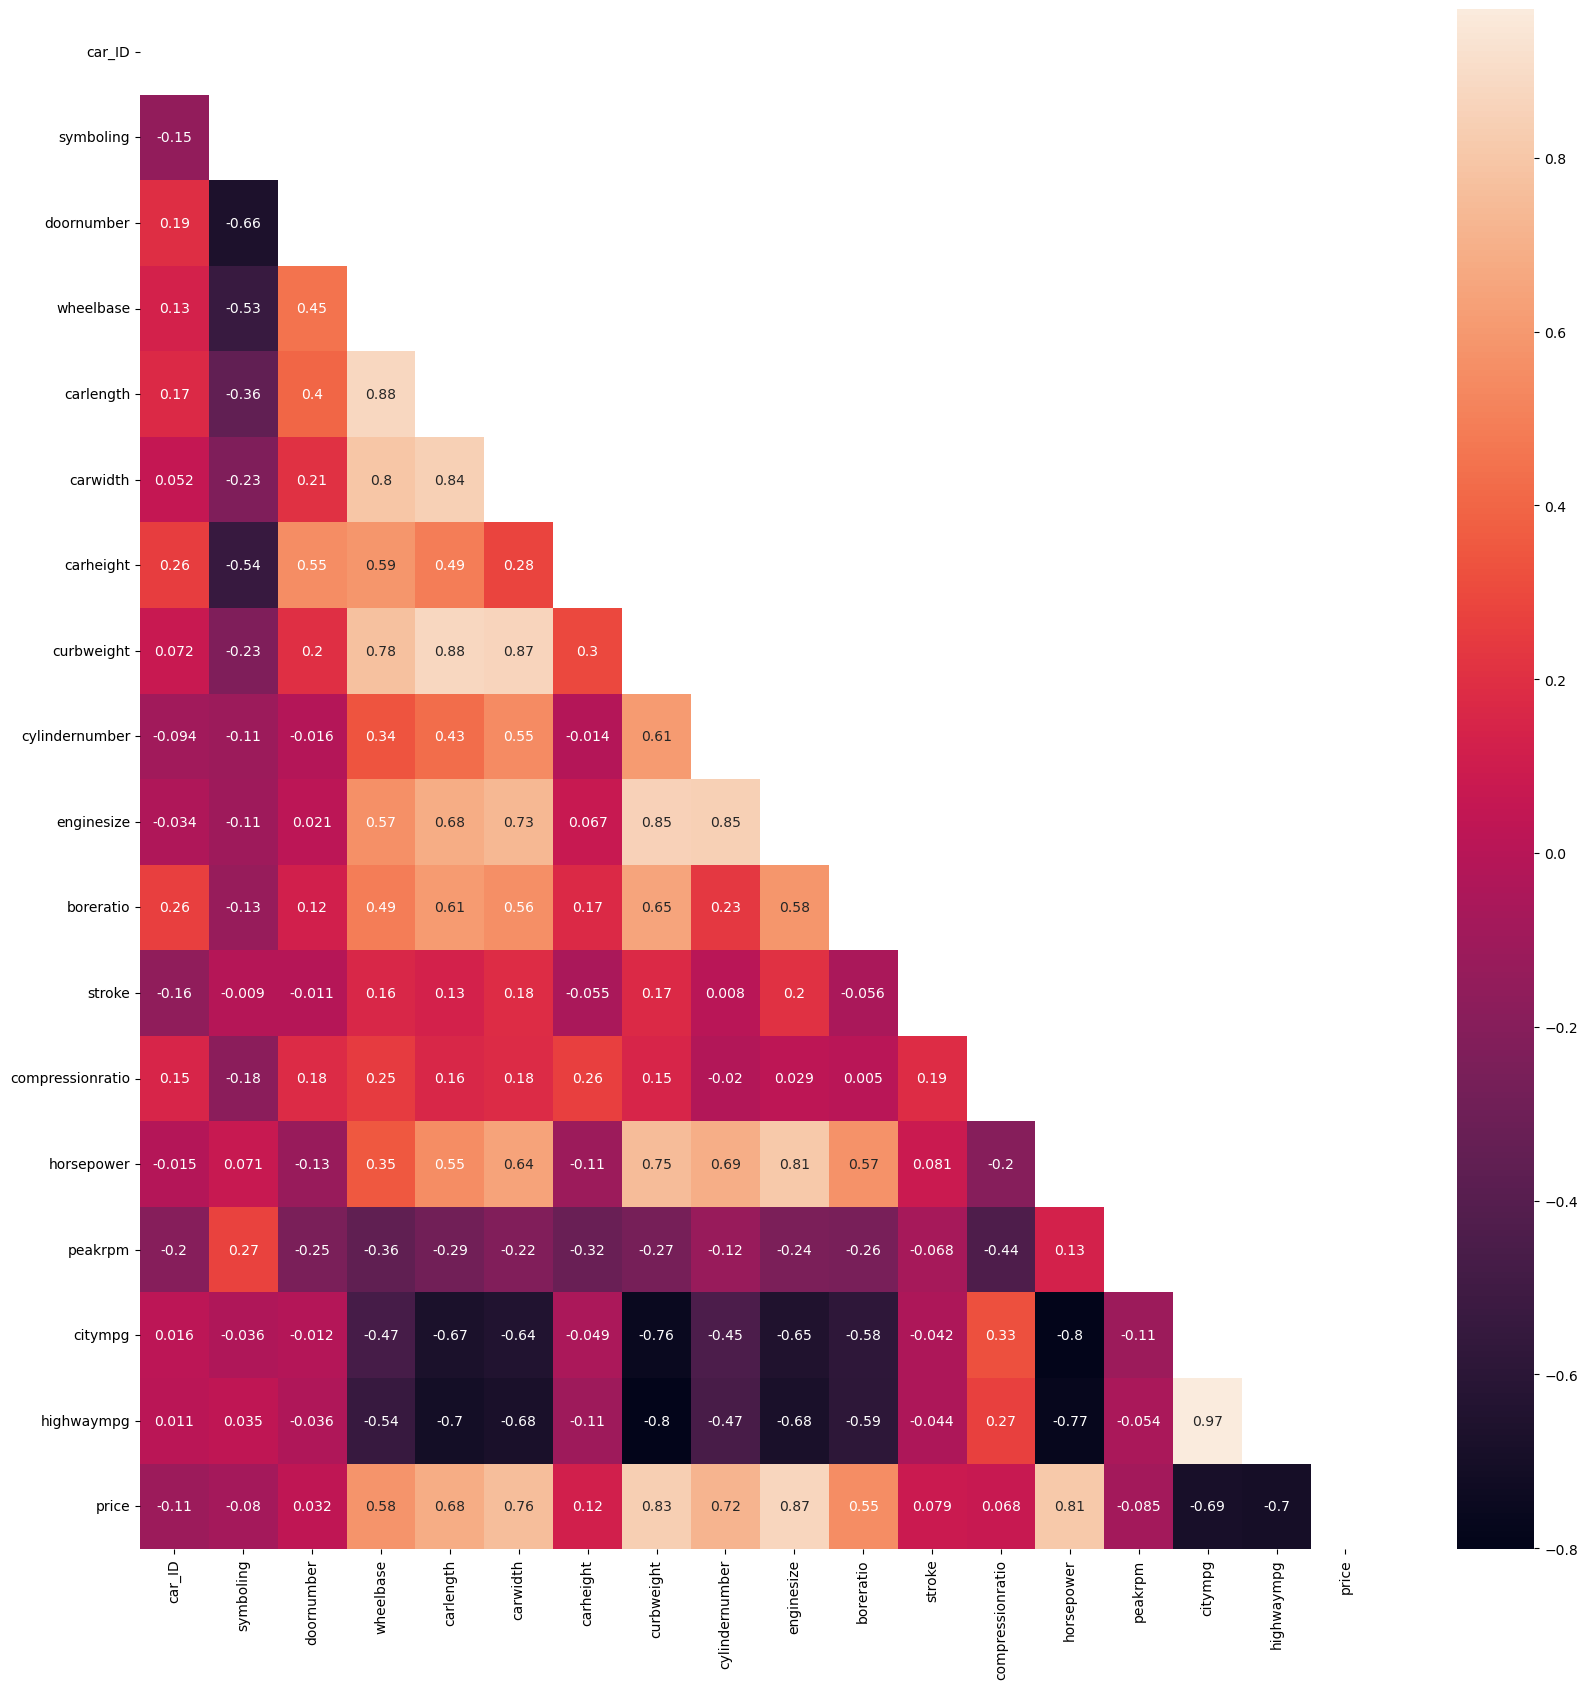

In [ ]:
fig = plt.figure(figsize=(20,20))
numeric_df = car_df[car_df.describe().columns]

matrix = np.triu(numeric_df.corr())
sns.heatmap(numeric_df.corr().round(3), mask=matrix, annot=True)

plt.show()

We can see from the heatmap that

- `price` is highly correlated with `curbweight`, `enginesize`, `carwidth`, `carlength`, `cylindernumber` and  `horsepower`.

- `price` is also correlated with `wheelbase` and `boreratio` but with smaller correlation value.

- `price` has a strong negative relationship with `citympg` and `highwaympg`.

<Axes: xlabel='doornumber', ylabel='price'>

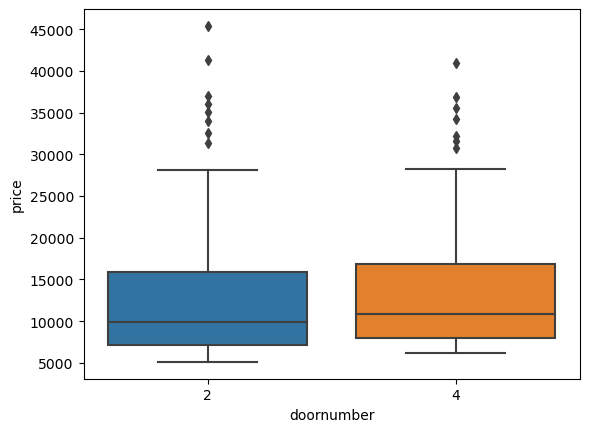

In [ ]:
sns.boxplot(data=car_df, x='doornumber', y='price')

We can see from the side-by-side box plots that `price` does not have a association with `doornumber`.Because the median of two categories are near to eachother and their interquartile range have a large overlap.

<Axes: xlabel='cylindernumber', ylabel='price'>

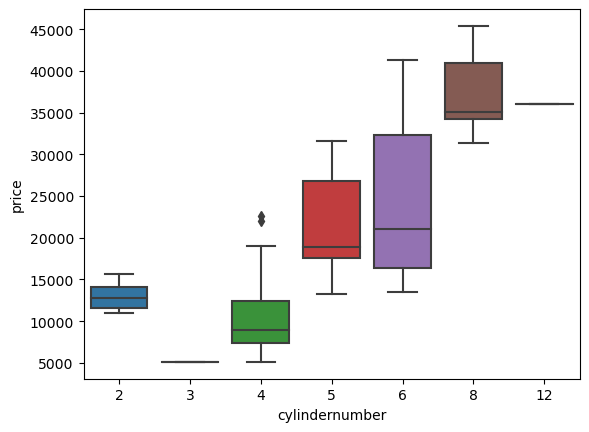

In [ ]:
sns.boxplot(data=car_df, x='cylindernumber', y='price')

We can see that there is no overlap in the interquartile ranges of some of the side-by-side box plots. This suggests that there might be an association between the number of cylinders and the car price.

<Axes: xlabel='carbody', ylabel='price'>

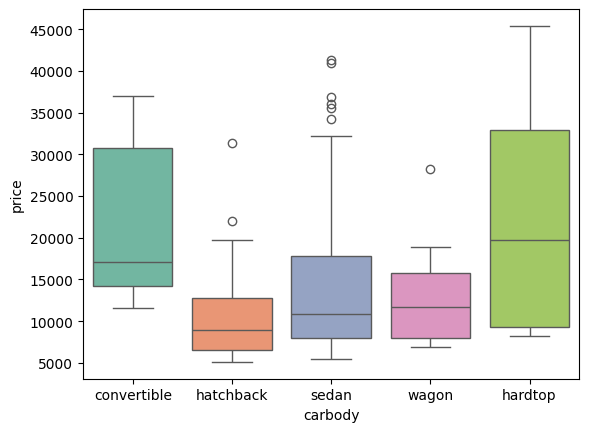

In [ ]:
sns.boxplot(data=car_df, x='carbody', y='price', palette='Set2')

According to the boxplot, there is no overlap in the interquartile ranges of some of categories. This suggests that there might be an association between car body types and price of the car.

<Axes: xlabel='enginetype', ylabel='price'>

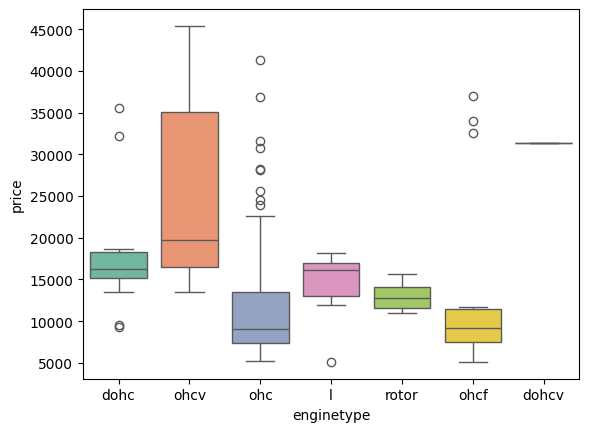

In [ ]:
sns.boxplot(data=car_df, x='enginetype', y='price', palette='Set2')

As we can see from the boxplot, the interquartile ranges of different categories do not overlap, suggesting that engine type may be associated with the price of the car.

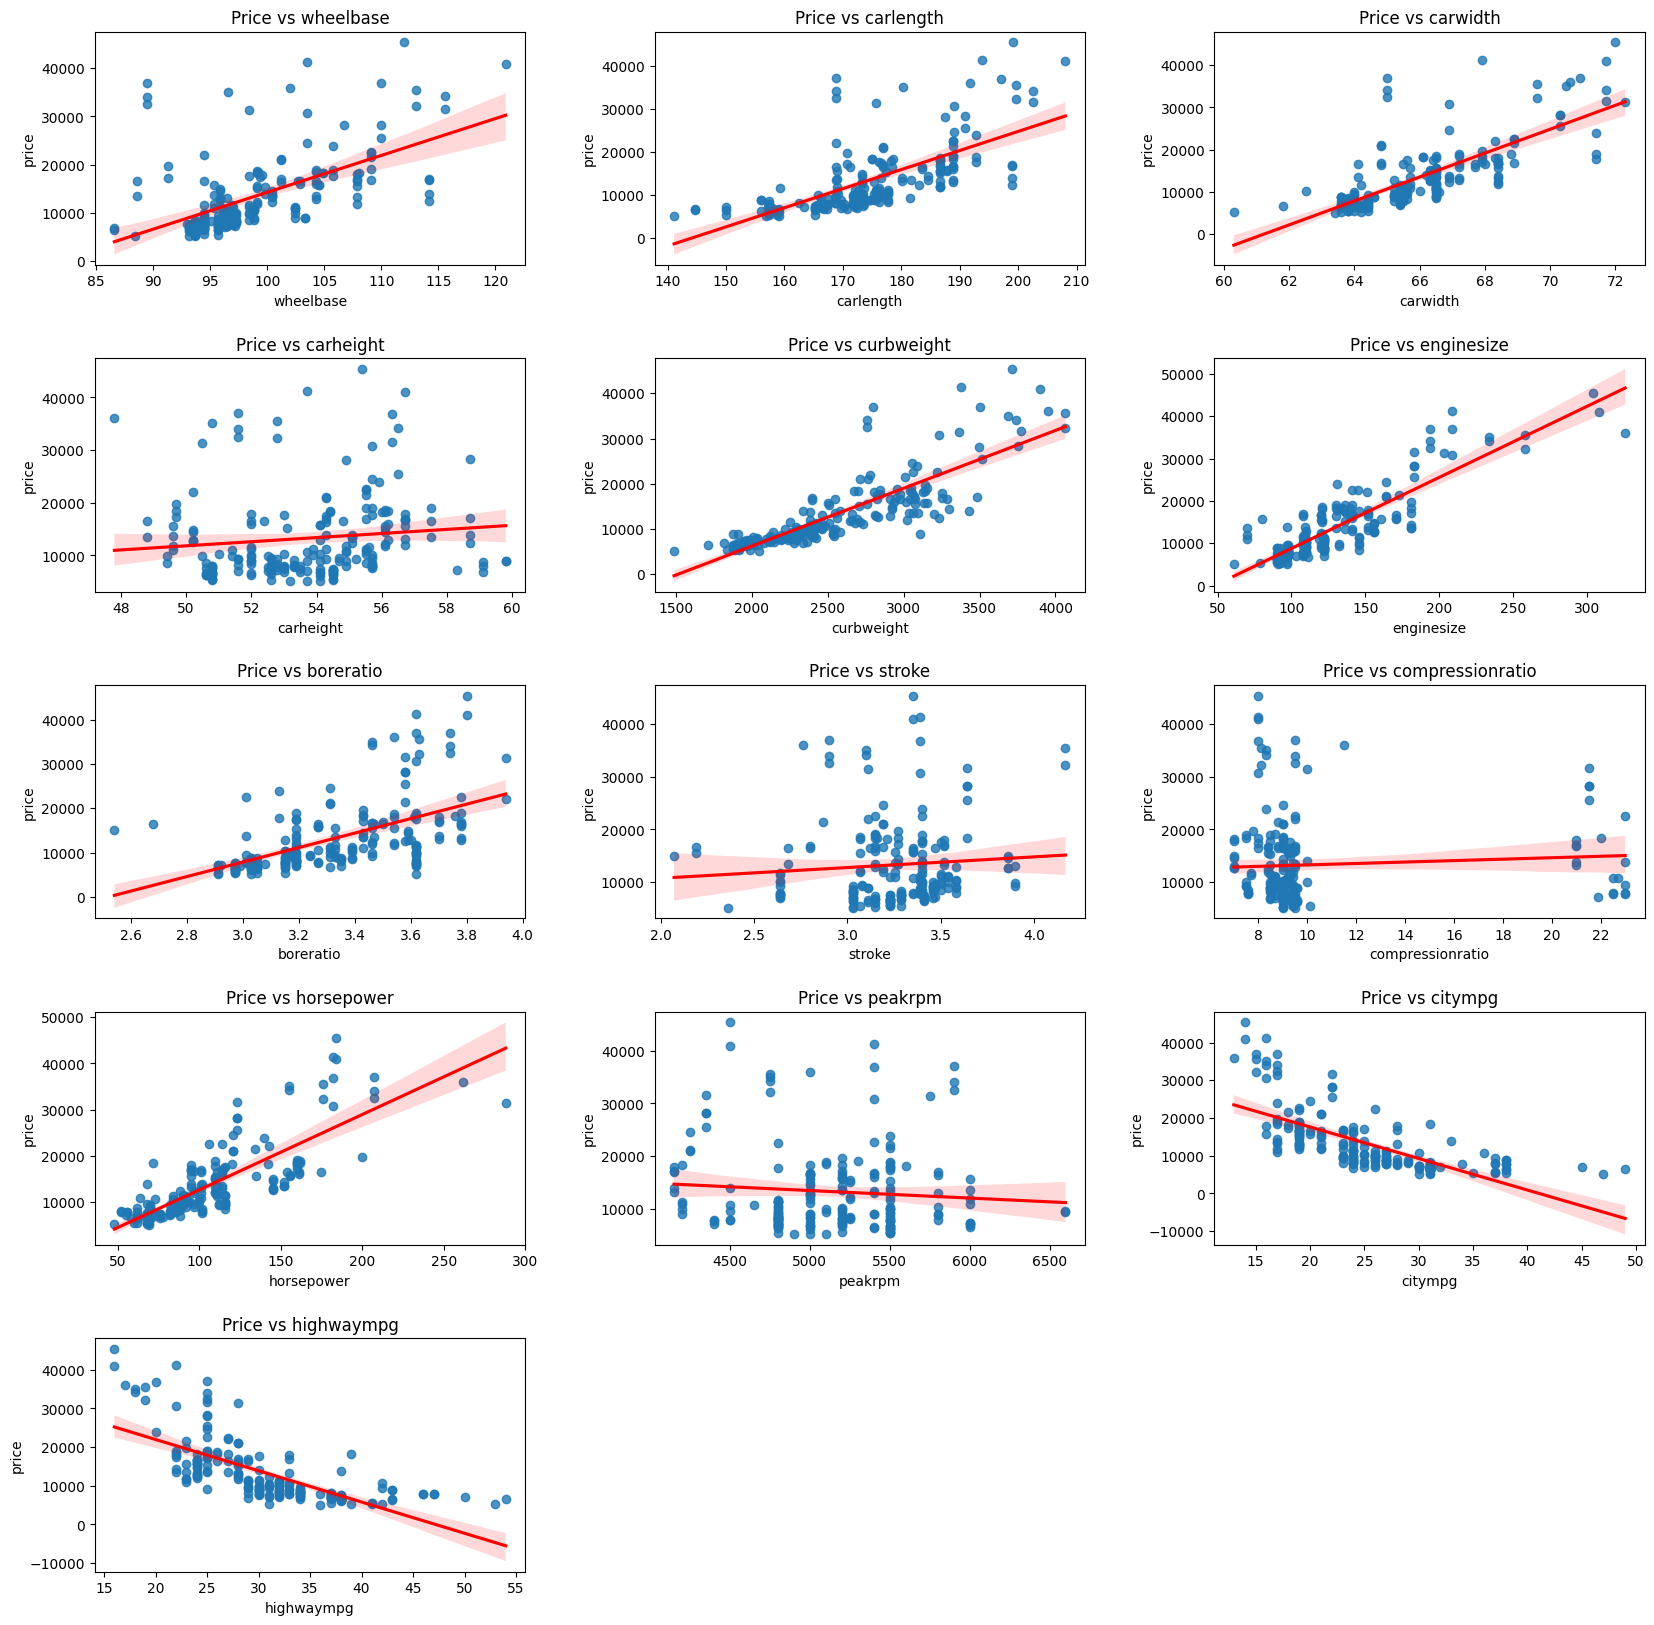

In [ ]:
numeric_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg']

plt.figure(figsize=(20,20))

size = len(numeric_cols)

plt.subplots_adjust(wspace=0.3,
                    hspace=0.4)


for i in range(0,size):
    plt.subplot(5,3,i+1)
    sns.regplot(data=car_df, x=numeric_cols[i], y='price', line_kws={"color": "red"})
    plt.title(f'Price vs {numeric_cols[i]}')
plt.show()

## Data Preperation

First of all, I drop the unnecessary columns(`car_ID` and `CarName`).

In [ ]:
temp_df = car_df.drop(columns=['car_ID', 'CarName'])

In [ ]:
temp_df = pd.get_dummies(temp_df, columns= ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'], drop_first =True)

### Splitting Data

In [ ]:
#Y is the target column, X has the features
X = temp_df.drop(["price"], axis=1)

#X = X.values
y = temp_df['price'].values

In [ ]:
#Split the data into training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

#Split the training data into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state = 42)

### Standardization

In [ ]:
scaler_x = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
X_valid = scaler_x.transform(X_valid)
X_test = scaler_x.transform(X_test)

In [ ]:
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

When performing regression with neural networks, it's often helpful to normalize both the inputs and the outputs.

In this regression task, I used a Multi-Layer Perceptron (MLP) neural network to predict car prices. Initially, the model returned NaN values for the loss, MSE, and MAE during training. This was likely due to the large range and variance in the target variable, which can make optimization unstable. To address this, I applied StandardScaler to the target values, which helped stabilize the training process and allowed the model to converge properly.

## Define Model

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

## Compile Model

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

## Fit the model

In [ ]:
history = model.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 1.8922 - mae: 0.9491 - mse: 1.8922 - val_loss: 0.5763 - val_mae: 0.5627 - val_mse: 0.5763
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7294 - mae: 0.6264 - mse: 0.7294 - val_loss: 0.3807 - val_mae: 0.4454 - val_mse: 0.3807
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3975 - mae: 0.4918 - mse: 0.3975 - val_loss: 0.2895 - val_mae: 0.3792 - val_mse: 0.2895
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2545 - mae: 0.3931 - mse: 0.2545 - val_loss: 0.2451 - val_mae: 0.3474 - val_mse: 0.2451
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2586 - mae: 0.4005 - mse: 0.2586 - val_loss: 0.2174 - val_mae: 0.3317 - val_mse: 0.2174
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2030 - mae: 0.3542 - mse: 0.2030 - val_loss: 0.1927 - val_mae: 0.3139 - val_mse: 0.1927
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2193 - mae: 0.3567 - mse: 0.2193 - val_loss: 0.1801 

## Evaluate Model on the Test Set

In order to take the predictions into the original scale, I used `inverse_transform` method.

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [ ]:
mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("MSE (real):", mse_real)
print("MAE (real):", mae_real)

MSE (real): 16548596.051349552
MAE (real): 2679.266372920867


In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

# Calculate the real MAE and MSE from scaled values for each epoch
real_mae = [mae * y_std for mae in history.history['mae']]
real_val_mae = [mae * y_std for mae in history.history['val_mae']]

mse_scaled = np.array(history.history['mse'])
val_mse_scaled = np.array(history.history['val_mse'])

real_rmse = y_std * np.sqrt(mse_scaled)
real_val_rmse = y_std * np.sqrt(val_mse_scaled)

In [ ]:
#store MAE and MSE values of different models in 4 lists for plotting

min_MAE_list =[]
min_MAE_list.append(min(real_mae))

min_RMSE_list = []
min_RMSE_list.append(min(real_rmse))

min_val_mae_list = []
min_val_mae_list.append(min(real_val_mae))

min_val_rmse_list = []
min_val_rmse_list.append(min(real_val_rmse))

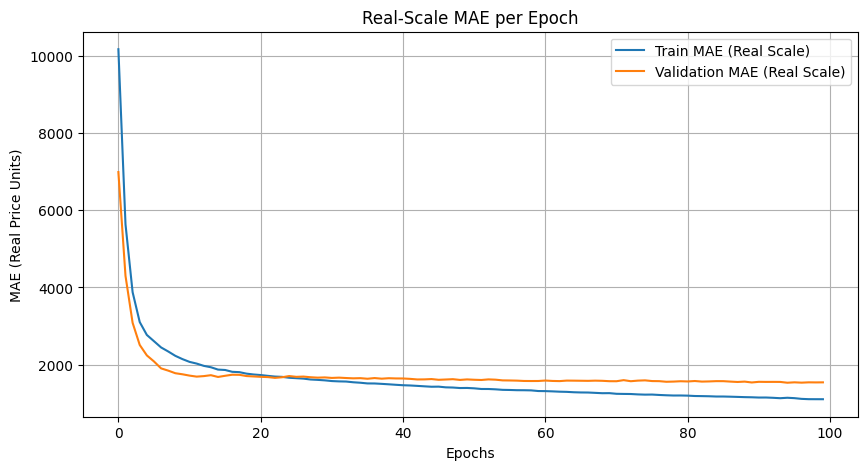

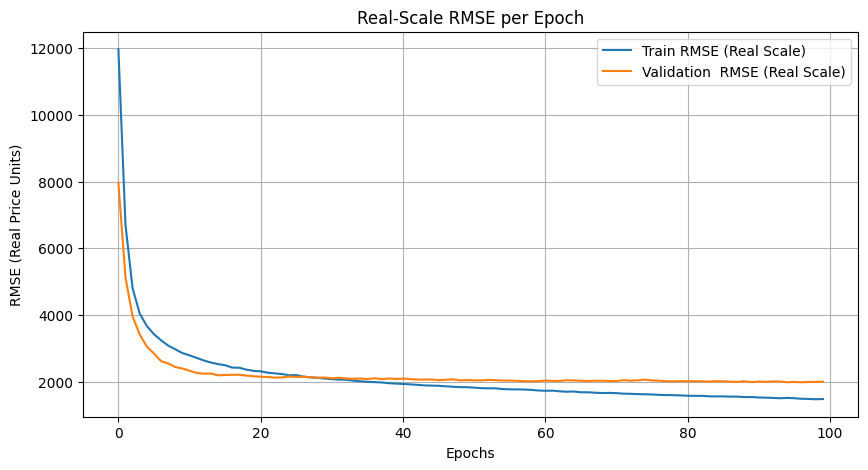

In [ ]:
# رسم MAE
plt.figure(figsize=(10, 5))
plt.plot(real_mae, label="Train MAE (Real Scale)")
plt.plot(real_val_mae, label="Validation MAE (Real Scale)")
plt.ylabel("MAE (Real Price Units)")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)
plt.title("Real-Scale MAE per Epoch")
plt.show()

# رسم MSE
plt.figure(figsize=(10, 5))
plt.plot(real_rmse, label="Train RMSE (Real Scale)")
plt.plot(real_val_rmse, label="Validation  RMSE (Real Scale)")
plt.ylabel("RMSE (Real Price Units)")
plt.xlabel("Epochs")
plt.legend()
plt.grid(True)
plt.title("Real-Scale RMSE per Epoch")
plt.show()

## Investigating the Effect of Increasing the Number of Neurons on Model Performance

Now lets check the mean absolute error for 5 networks with different number of neurons.

With 100 neurons:

In [ ]:
model2 = keras.models.Sequential([
keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
model2.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history2 = model2.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 1.1835 - mae: 0.8513 - mse: 1.1835 - val_loss: 0.2707 - val_mae: 0.4050 - val_mse: 0.2707
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4372 - mae: 0.5202 - mse: 0.4372 - val_loss: 0.1727 - val_mae: 0.2952 - val_mse: 0.1727
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3340 - mae: 0.4299 - mse: 0.3340 - val_loss: 0.1468 - val_mae: 0.2720 - val_mse: 0.1468
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2762 - mae: 0.3792 - mse: 0.2762 - val_loss: 0.1232 - val_mae: 0.2520 - val_mse: 0.1232
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2485 - mae: 0.3689 - mse: 0.2485 - val_loss: 0.1159 - val_mae: 0.2479 - val_mse: 0.1159
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1961 - mae: 0.3328 - mse: 0.1961 - val_loss: 0.1049 - val_mae: 0.2381 - val_mse: 0.1049
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1753 - mae: 0.3149 - mse: 0.1753 - val_loss: 0.1082 

In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

# Calculate the real MAE and MSE from scaled values for each epoch
real_mae2 = [mae * y_std for mae in history2.history['mae']]
real_val_mae2 = [mae * y_std for mae in history2.history['val_mae']]

mse_scaled2 = np.array(history2.history['mse'])
val_mse_scaled2 = np.array(history2.history['val_mse'])

real_rmse2 = y_std * np.sqrt(mse_scaled2)
real_val_rmse2 = y_std * np.sqrt(val_mse_scaled2)

In [ ]:
min_MAE_list.append(min(real_mae2))

min_RMSE_list.append(min(real_rmse2))

min_val_mae_list.append(min(real_val_mae2))

min_val_rmse_list.append(min(real_val_rmse2))

With 150 neurons:

In [ ]:
model3 = keras.models.Sequential([
keras.layers.Dense(150, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
model3.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history3 = model3.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.9873 - mae: 0.7101 - mse: 0.9873 - val_loss: 0.3069 - val_mae: 0.4352 - val_mse: 0.3069
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4668 - mae: 0.5034 - mse: 0.4668 - val_loss: 0.2301 - val_mae: 0.3778 - val_mse: 0.2301
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3023 - mae: 0.4243 - mse: 0.3023 - val_loss: 0.1898 - val_mae: 0.3403 - val_mse: 0.1898
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2717 - mae: 0.4091 - mse: 0.2717 - val_loss: 0.1621 - val_mae: 0.3110 - val_mse: 0.1621
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2172 - mae: 0.3728 - mse: 0.2172 - val_loss: 0.1369 - val_mae: 0.2843 - val_mse: 0.1369
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1948 - mae: 0.3599 - mse: 0.1948 - val_loss: 0.1246 - val_mae: 0.2685 - val_mse: 0.1246
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1838 - mae: 0.3353 - mse: 0.1838 - val_loss: 0.1145 

In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

# Calculate the real MAE and MSE from scaled values for each epoch
real_mae3 = [mae * y_std for mae in history3.history['mae']]
real_val_mae3 = [mae * y_std for mae in history3.history['val_mae']]

mse_scaled3 = np.array(history3.history['mse'])
val_mse_scaled3 = np.array(history3.history['val_mse'])

real_rmse3 = y_std * np.sqrt(mse_scaled3)
real_val_rmse3 = y_std * np.sqrt(val_mse_scaled3)

In [ ]:
min_MAE_list.append(min(real_mae3))

min_RMSE_list.append(min(real_rmse3))

min_val_mae_list.append(min(real_val_mae3))

min_val_rmse_list.append(min(real_val_rmse3))

With 200 neurons:

In [ ]:
model4 = keras.models.Sequential([
keras.layers.Dense(200, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
model4.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history4 = model4.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.8837 - mae: 0.7443 - mse: 0.8837 - val_loss: 0.3464 - val_mae: 0.4697 - val_mse: 0.3464
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3330 - mae: 0.4414 - mse: 0.3330 - val_loss: 0.2400 - val_mae: 0.3783 - val_mse: 0.2400
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2229 - mae: 0.3523 - mse: 0.2229 - val_loss: 0.1605 - val_mae: 0.3292 - val_mse: 0.1605
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2058 - mae: 0.3385 - mse: 0.2058 - val_loss: 0.1268 - val_mae: 0.3081 - val_mse: 0.1268
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1904 - mae: 0.3233 - mse: 0.1904 - val_loss: 0.1132 - val_mae: 0.2971 - val_mse: 0.1132
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1842 - mae: 0.3173 - mse: 0.1842 - val_loss: 0.1009 - val_mae: 0.2858 - val_mse: 0.1009
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1458 - mae: 0.2764 - mse: 0.1458 - val_loss: 0.0922 

In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

# Calculate the real MAE and MSE from scaled values for each epoch
real_mae4 = [mae * y_std for mae in history4.history['mae']]
real_val_mae4 = [mae * y_std for mae in history4.history['val_mae']]

mse_scaled4 = np.array(history4.history['mse'])
val_mse_scaled4 = np.array(history4.history['val_mse'])

real_rmse4 = y_std * np.sqrt(mse_scaled4)
real_val_rmse4 = y_std * np.sqrt(val_mse_scaled4)

In [ ]:
min_MAE_list.append(min(real_mae4))

min_RMSE_list.append(min(real_rmse4))

min_val_mae_list.append(min(real_val_mae4))

min_val_rmse_list.append(min(real_val_rmse4))

With 400 neurons:

In [ ]:
model5 = keras.models.Sequential([
keras.layers.Dense(400, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
model5.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history5 = model5.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 1.2385 - mae: 0.6974 - mse: 1.2385 - val_loss: 0.2011 - val_mae: 0.3654 - val_mse: 0.2011
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4284 - mae: 0.4254 - mse: 0.4284 - val_loss: 0.1301 - val_mae: 0.2908 - val_mse: 0.1301
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2109 - mae: 0.3236 - mse: 0.2109 - val_loss: 0.1025 - val_mae: 0.2610 - val_mse: 0.1025
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1721 - mae: 0.3055 - mse: 0.1721 - val_loss: 0.0880 - val_mae: 0.2439 - val_mse: 0.0880
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1447 - mae: 0.2762 - mse: 0.1447 - val_loss: 0.0744 - val_mae: 0.2280 - val_mse: 0.0744
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1276 - mae: 0.2670 - mse: 0.1276 - val_loss: 0.0679 - val_mae: 0.2191 - val_mse: 0.0679
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1274 - mae: 0.2633 - mse: 0.1274 - val_loss: 0.0644 

In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

# Calculate the real MAE and MSE from scaled values for each epoch
real_mae5 = [mae * y_std for mae in history5.history['mae']]
real_val_mae5 = [mae * y_std for mae in history5.history['val_mae']]

mse_scaled5 = np.array(history5.history['mse'])
val_mse_scaled5 = np.array(history5.history['val_mse'])

real_rmse5 = y_std * np.sqrt(mse_scaled5)
real_val_rmse5 = y_std * np.sqrt(val_mse_scaled5)

In [ ]:
min_MAE_list.append(min(real_mae5))

min_RMSE_list.append(min(real_rmse5))

min_val_mae_list.append(min(real_val_mae5))

min_val_rmse_list.append(min(real_val_rmse5))

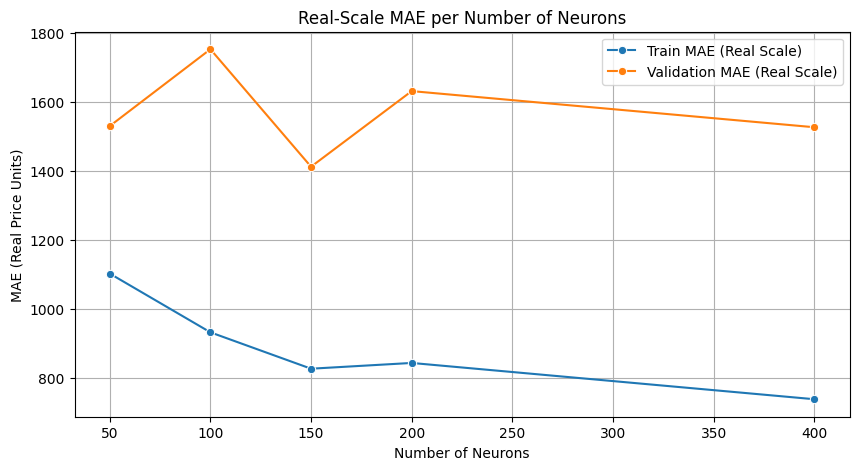

In [ ]:
num_of_neurons = [50, 100, 150, 200, 400]

plt.figure(figsize=(10, 5))
sns.lineplot(x= num_of_neurons, y=min_MAE_list, label="Train MAE (Real Scale)", marker ='o')
sns.lineplot(x= num_of_neurons, y=min_val_mae_list, label="Validation MAE (Real Scale)", marker ='o')
plt.ylabel("MAE (Real Price Units)")
plt.xlabel("Number of Neurons")
plt.legend()
plt.grid(True)
plt.title("Real-Scale MAE per Number of Neurons")
plt.show()

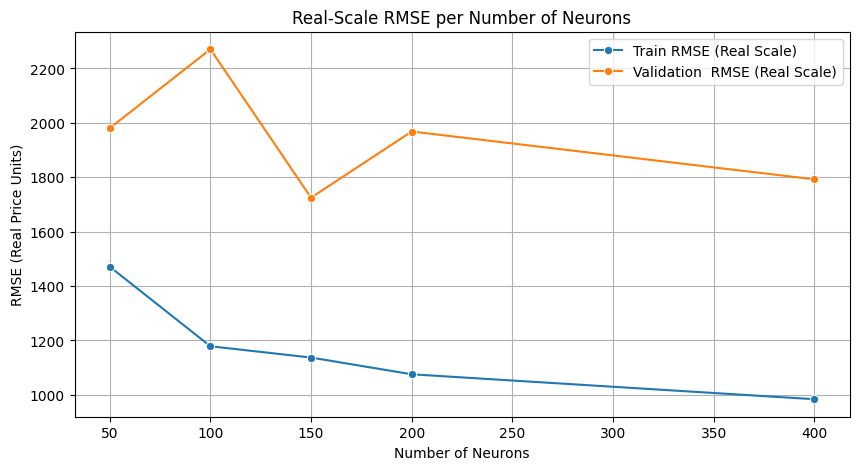

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x= num_of_neurons, y=min_RMSE_list, label="Train RMSE (Real Scale)", marker ='o')
sns.lineplot(x= num_of_neurons, y=min_val_rmse_list, label="Validation  RMSE (Real Scale)", marker ='o')
plt.ylabel("RMSE (Real Price Units)")
plt.xlabel("Number of Neurons")
plt.legend()
plt.grid(True)
plt.title("Real-Scale RMSE per Number of Neurons")
plt.show()

Increasing the number of neurons consistently reduced the training error (both MAE and RMSE), which indicates that the model gained more capacity to learn complex patterns in the data. However, on the validation set, the improvement was not monotonic. While the validation error initially decreased as the number of neurons increased (up to around 150 neurons), it started to increase slightly afterward. This suggests the model may begin to overfit as its complexity grows. Therefore, while adding more neurons can enhance learning, it must be done with caution to avoid overfitting.

## Investigating the Effect of Increasing the Number of Hidden Layers on Model Performance

With One Layer:

In [ ]:
model = keras.models.Sequential([
keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
stopEarly = keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights= True, patience=5)

In [ ]:
history = model.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled), callbacks=[stopEarly])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.7758 - mae: 0.6644 - mse: 0.7758 - val_loss: 0.2274 - val_mae: 0.3927 - val_mse: 0.2274
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4388 - mae: 0.5105 - mse: 0.4388 - val_loss: 0.1462 - val_mae: 0.3063 - val_mse: 0.1462
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2907 - mae: 0.4242 - mse: 0.2907 - val_loss: 0.1182 - val_mae: 0.2697 - val_mse: 0.1182
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2234 - mae: 0.3639 - mse: 0.2234 - val_loss: 0.1002 - val_mae: 0.2531 - val_mse: 0.1002
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2071 - mae: 0.3434 - mse: 0.2071 - val_loss: 0.0907 - val_mae: 0.2417 - val_mse: 0.0907
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1876 - mae: 0.3306 - mse: 0.1876 - val_loss: 0.0873 - val_mae: 0.2349 - val_mse: 0.0873
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1789 - mae: 0.3217 - mse: 0.1789 - val_loss: 0.0846 

### Evaluate Model On Test Set

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("RMSE (real):", np.sqrt(mse_real))
print("MAE (real):", mae_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
RMSE (real): 4278.6025936410415
MAE (real): 2888.26859085969


In [ ]:
rmse_list=[]
mae_list=[]

rmse_list.append(np.sqrt(mse_real))
mae_list.append(mae_real)

In [ ]:
# Extract standard deviation of target from StandardScaler
y_std = scaler_y.scale_[0]

min_MAE_list = []

min_RMSE_list = []

min_val_mae_list = []

min_val_rmse_list = []

In [ ]:
# Calculate the real MAE and MSE from scaled values for each epoch
real_mae = [mae * y_std for mae in history.history['mae']]
real_val_mae = [mae * y_std for mae in history.history['val_mae']]

mse_scaled = np.array(history.history['mse'])
val_mse_scaled = np.array(history.history['val_mse'])

real_rmse = y_std * np.sqrt(mse_scaled)
real_val_rmse = y_std * np.sqrt(val_mse_scaled)

min_MAE_list.append(min(real_mae))

min_RMSE_list.append(min(real_rmse))

min_val_mae_list.append(min(real_val_mae))

min_val_rmse_list.append(min(real_val_rmse))

With Two Layers:

In [ ]:
model2 = keras.models.Sequential([
keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])

In [ ]:
model2.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history2 = model2.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled), callbacks=[stopEarly])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 1.2418 - mae: 0.9100 - mse: 1.2418 - val_loss: 0.4533 - val_mae: 0.6036 - val_mse: 0.4533
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6381 - mae: 0.6284 - mse: 0.6381 - val_loss: 0.2268 - val_mae: 0.3906 - val_mse: 0.2268
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3826 - mae: 0.4555 - mse: 0.3826 - val_loss: 0.1509 - val_mae: 0.2864 - val_mse: 0.1509
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2496 - mae: 0.3620 - mse: 0.2496 - val_loss: 0.1172 - val_mae: 0.2536 - val_mse: 0.1172
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2159 - mae: 0.3428 - mse: 0.2159 - val_loss: 0.0989 - val_mae: 0.2337 - val_mse: 0.0989
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1755 - mae: 0.3028 - mse: 0.1755 - val_loss: 0.0793 - val_mae: 0.2219 - val_mse: 0.0793
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1689 - mae: 0.3031 - mse: 0.1689 - val_loss: 0.0766

In [ ]:
y_pred_scaled = model2.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("RMSE (real):", np.sqrt(mse_real))
print("MAE (real):", mae_real)

rmse_list.append(np.sqrt(mse_real))
mae_list.append(mae_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
RMSE (real): 4095.6610542341696
MAE (real): 2534.586921685988


In [ ]:
# Calculate the real MAE and MSE from scaled values for each epoch
real_mae2 = [mae * y_std for mae in history2.history['mae']]
real_val_mae2 = [mae * y_std for mae in history2.history['val_mae']]

mse_scaled2 = np.array(history2.history['mse'])
val_mse_scaled2 = np.array(history2.history['val_mse'])

real_rmse2 = y_std * np.sqrt(mse_scaled2)
real_val_rmse2 = y_std * np.sqrt(val_mse_scaled2)

min_MAE_list.append(min(real_mae2))

min_RMSE_list.append(min(real_rmse2))

min_val_mae_list.append(min(real_val_mae2))

min_val_rmse_list.append(min(real_val_rmse2))

With Five Layers:

In [ ]:
model3 = keras.models.Sequential([
keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])

In [ ]:
model3.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history3 = model3.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled), callbacks=[stopEarly])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 1.1623 - mae: 0.8231 - mse: 1.1623 - val_loss: 0.7413 - val_mae: 0.6999 - val_mse: 0.7413
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8542 - mae: 0.7436 - mse: 0.8542 - val_loss: 0.6330 - val_mae: 0.6504 - val_mse: 0.6330
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.5874 - mae: 0.6154 - mse: 0.5874 - val_loss: 0.5318 - val_mae: 0.6020 - val_mse: 0.5318
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6641 - mae: 0.6370 - mse: 0.6641 - val_loss: 0.4017 - val_mae: 0.5251 - val_mse: 0.4017
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4536 - mae: 0.5095 - mse: 0.4536 - val_loss: 0.2886 - val_mae: 0.4513 - val_mse: 0.2886
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3170 - mae: 0.4493 - mse: 0.3170 - val_loss: 0.2035 - val_mae: 0.3839 - val_mse: 0.2035
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2482 - mae: 0.3835 - mse: 0.2482 - val_loss: 0.1482 

In [ ]:
y_pred_scaled = model3.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("RMSE (real):", np.sqrt(mse_real))
print("MAE (real):", mae_real)

rmse_list.append(np.sqrt(mse_real))
mae_list.append(mae_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
RMSE (real): 3259.2047587512197
MAE (real): 2220.8632416204637


In [ ]:
# Calculate the real MAE and MSE from scaled values for each epoch
real_mae3 = [mae * y_std for mae in history3.history['mae']]
real_val_mae3 = [mae * y_std for mae in history3.history['val_mae']]

mse_scaled3 = np.array(history3.history['mse'])
val_mse_scaled3 = np.array(history3.history['val_mse'])

real_rmse3 = y_std * np.sqrt(mse_scaled3)
real_val_rmse3 = y_std * np.sqrt(val_mse_scaled3)

min_MAE_list.append(min(real_mae3))

min_RMSE_list.append(min(real_rmse3))

min_val_mae_list.append(min(real_val_mae3))

min_val_rmse_list.append(min(real_val_rmse3))

With Seven Layers:

In [ ]:
model4 = keras.models.Sequential([
keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(1)
])

In [ ]:
model4.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history4 = model4.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled), callbacks=[stopEarly])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.9435 - mae: 0.7532 - mse: 0.9435 - val_loss: 0.7266 - val_mae: 0.6771 - val_mse: 0.7266
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8611 - mae: 0.7223 - mse: 0.8611 - val_loss: 0.7056 - val_mae: 0.6687 - val_mse: 0.7056
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9111 - mae: 0.7122 - mse: 0.9111 - val_loss: 0.6772 - val_mae: 0.6567 - val_mse: 0.6772
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8844 - mae: 0.6977 - mse: 0.8844 - val_loss: 0.6363 - val_mae: 0.6371 - val_mse: 0.6363
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7019 - mae: 0.6443 - mse: 0.7019 - val_loss: 0.5862 - val_mae: 0.6115 - val_mse: 0.5862
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7841 - mae: 0.6802 - mse: 0.7841 - val_loss: 0.5201 - val_mae: 0.5765 - val_mse: 0.5201
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6833 - mae: 0.6123 - mse: 0.6833 - val_loss: 0.4535 

In [ ]:
y_pred_scaled = model4.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("RMSE (real):", np.sqrt(mse_real))
print("MAE (real):", mae_real)

rmse_list.append(np.sqrt(mse_real))
mae_list.append(mae_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
RMSE (real): 3344.6663753044168
MAE (real): 2096.181798387097


In [ ]:
# Calculate the real MAE and MSE from scaled values for each epoch
real_mae4 = [mae * y_std for mae in history4.history['mae']]
real_val_mae4 = [mae * y_std for mae in history4.history['val_mae']]

mse_scaled4 = np.array(history4.history['mse'])
val_mse_scaled4 = np.array(history4.history['val_mse'])

real_rmse4 = y_std * np.sqrt(mse_scaled4)
real_val_rmse4 = y_std * np.sqrt(val_mse_scaled4)

min_MAE_list.append(min(real_mae4))

min_RMSE_list.append(min(real_rmse4))

min_val_mae_list.append(min(real_val_mae4))

min_val_rmse_list.append(min(real_val_rmse4))

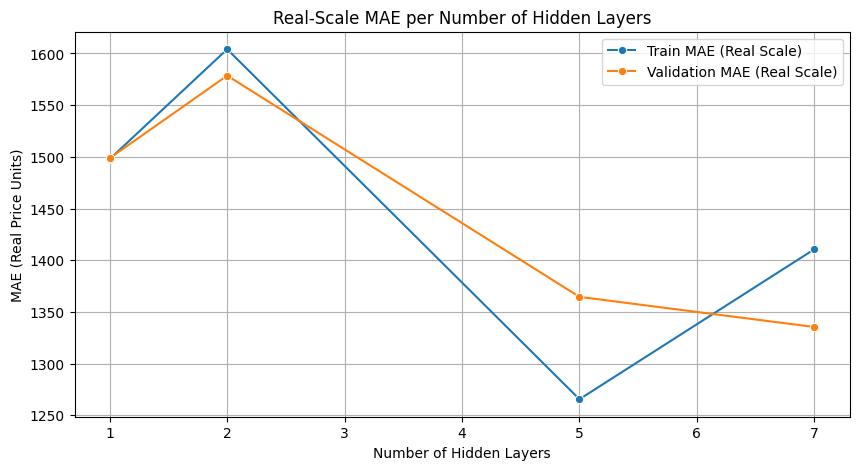

In [ ]:
num_of_hidden_layers = [1, 2, 5, 7]

plt.figure(figsize=(10, 5))
sns.lineplot(x= num_of_hidden_layers, y=min_MAE_list, label="Train MAE (Real Scale)", marker ='o')
sns.lineplot(x= num_of_hidden_layers, y=min_val_mae_list, label="Validation MAE (Real Scale)", marker ='o')
plt.ylabel("MAE (Real Price Units)")
plt.xlabel("Number of Hidden Layers")
plt.legend()
plt.grid(True)
plt.title("Real-Scale MAE per Number of Hidden Layers")
plt.show()

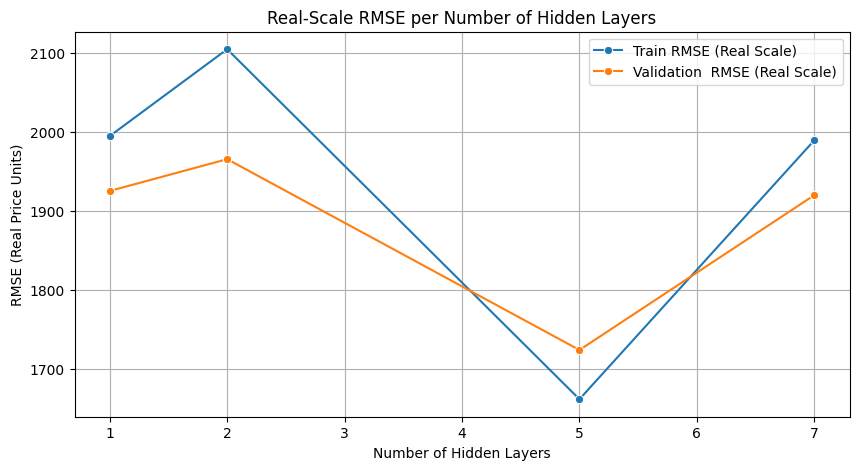

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x= num_of_hidden_layers, y=min_RMSE_list, label="Train RMSE (Real Scale)", marker ='o')
sns.lineplot(x= num_of_hidden_layers, y=min_val_rmse_list, label="Validation  RMSE (Real Scale)", marker ='o')
plt.ylabel("RMSE (Real Price Units)")
plt.xlabel("Number of Hidden Layers")
plt.legend()
plt.grid(True)
plt.title("Real-Scale RMSE per Number of Hidden Layers")
plt.show()

MAE Trends:
- The mean absolute error (MAE) initially increases from 1 to 2 hidden layers, then decreases significantly with 5 hidden layers, indicating improved prediction accuracy. However, beyond 5 layers, a slight increase in MAE suggests potential overfitting.

RMSE Trends:
- The root mean square error (RMSE) follows a similar pattern, with the lowest value also observed at 5 hidden layers. This reinforces the observation that the 5-layer model offers the best performance in terms of both average and extreme prediction errors.

In conclusion, both MAE and RMSE plots highlight that using 5 hidden layers provides an optimal balance between model complexity and generalization ability.

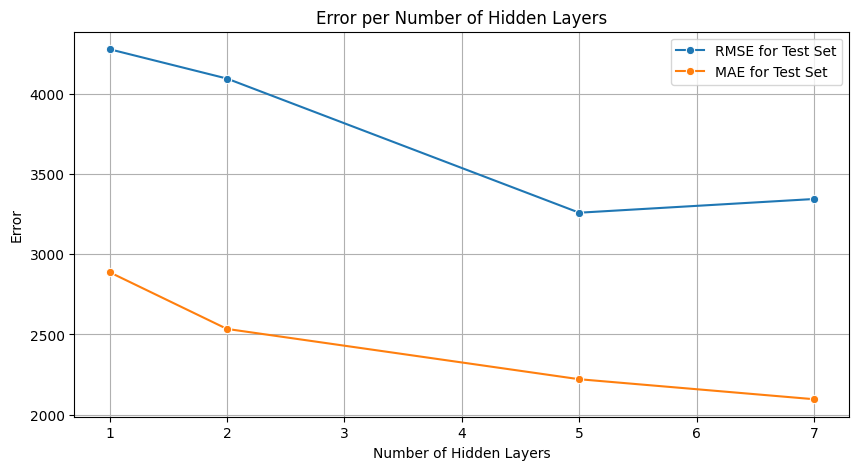

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x= num_of_hidden_layers, y=rmse_list, label="RMSE for Test Set", marker ='o')
sns.lineplot(x= num_of_hidden_layers, y=mae_list, label="MAE for Test Set", marker ='o')
plt.ylabel("Error")
plt.xlabel("Number of Hidden Layers")
plt.legend()
plt.grid(True)
plt.title("Error per Number of Hidden Layers")
plt.show()

The results show that increasing the number of hidden layers in the artificial neural network had a significant effect on the model’s performance in terms of MAE and RMSE on the test set.

- The model with 5 hidden layers achieved the lowest RMSE (3259.20), indicating that it performed best in minimizing large prediction errors.

- The model with 7 hidden layers yielded the lowest MAE (2096.18), which means it had the lowest average error overall. However, its RMSE increased slightly compared to the 5-layer model, suggesting that it may have overfitted to some specific data points.

- Models with fewer layers (1 and 2) showed higher errors, indicating underfitting and insufficient model complexity.

Overall, the 5 hidden layer model appears to provide the best balance between bias and variance, offering robust generalization performance on unseen data.

## Wide and Deep Model

In [ ]:
#wide and deep model

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)

# Instantiate Concatenate layer, then call it
concat = keras.layers.Concatenate()([input, hidden2])

outputs = keras.layers.Dense(1)(concat)

wide_and_deep_model = keras.models.Model(inputs=[input], outputs=[outputs])

In [ ]:
wide_and_deep_model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae", "mse"])

In [ ]:
history_wide_and_deep = wide_and_deep_model.fit(X_train, y_train_scaled, epochs=100, validation_data=(X_valid, y_valid_scaled), callbacks=[stopEarly])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.7495 - mae: 0.6267 - mse: 0.7495 - val_loss: 0.1769 - val_mae: 0.3474 - val_mse: 0.1769
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3691 - mae: 0.4430 - mse: 0.3691 - val_loss: 0.1239 - val_mae: 0.2940 - val_mse: 0.1239
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3324 - mae: 0.4246 - mse: 0.3324 - val_loss: 0.1141 - val_mae: 0.2781 - val_mse: 0.1141
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2553 - mae: 0.3588 - mse: 0.2553 - val_loss: 0.1056 - val_mae: 0.2653 - val_mse: 0.1056
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2083 - mae: 0.3311 - mse: 0.2083 - val_loss: 0.0998 - val_mae: 0.2554 - val_mse: 0.0998
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1935 - mae: 0.3095 - mse: 0.1935 - val_loss: 0.0950 - val_mae: 0.2521 - val_mse: 0.0950
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1544 - mae: 0.2879 - mse: 0.1544 - val_loss: 0.0912

In [ ]:
y_pred_scaled = wide_and_deep_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)

print("RMSE (real):", np.sqrt(mse_real))
print("MAE (real):", mae_real)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
RMSE (real): 3704.0959649492734
MAE (real): 2496.6085365108365


In [ ]:
# make a dataframe for comparing the performance of two networks

data = {
    'Model': ['Deep Neural Network', 'Wide & Deep Neural Network'],
    'RMSE (real)': [3259.20, 3704.10],
    'MAE (real)': [2220.86, 2496.61]
}

df = pd.DataFrame(data)

print(df)

                        Model  RMSE (real)  MAE (real)
0         Deep Neural Network       3259.2     2220.86
1  Wide & Deep Neural Network       3704.1     2496.61


When we compare the RMSE and MAE of the optimal 5-layered deep neural network with the corresponding values ​of the wide and deep neural network, we see that the error of the deep network is lower.

## Conclusions

- The 90% of cars use diesel fuel.
- 82% of cars have naturally aspirated engines that draw in air naturally.
- The 18% of cars have forced induction through a turbocharger.
- Most of the cars have 4 doors.
- The majority of cars(47% or 96 cars) have Sedan body configurations.Only 6 cars have convertible body.
- The majority of the cars in the dataset (59%) are equipped with front-wheel drive.
- Rear-wheel drive vehicles account for approximately 37% of the data, while only about 4% have four-wheel drive.
- The engines of 99% of the cars in this dataset are located in the front, while only 1% have their engines in the rear.
- The majority of cars have an overhead camshaft(ohc) engine type.
- The engine of the majority of cars have multi-point fuel injection (MPFI) system with 94 instances
- The wheelbase of most cars ranges between 92 and 97 inches.
- The majority of cars in this dataset have a length between 170 and 175 inches.
- The majority of cars in this dataset have a width between 63 and 66 inches.
- The most common range for car height is between 52 and 56 inches.
- Most cars have a curb weight ranging from 2000 to 2500 lbs.
- The engine size of most cars in the dataset falls within the range of 85 to 115 cc.
- The majority of cars have a compression ratio between 8 and 10.
- Price is highly correlated with curbweight, enginesize, carwidth, carlength, cylindernumber and horsepower.
- Price has a strong negative relationship with citympg and highwaympg.
- There is an association between the number of cylinders and the car price.
- Increasing the number of neurons improved training performance, but after a point (around 150), validation error began to rise slightly, suggesting potential overfitting due to model complexity.
- Increasing hidden layers improved performance up to 5 layers, where both MAE and RMSE were minimized, but adding more layers led to slight overfitting and reduced generalization.